# Results Plotting Demo

This notebook serves to make some simple plots of the 1) losses and 2) entities and relations following training with the PyKEEN pipeline.

In [1]:
import os

import numpy as np
import pykeen
from matplotlib import pyplot as plt

from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/home/nnnpooh/anaconda3/envs/pykeen/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pykeen.env()

| Key             | Value                    |
|-----------------|--------------------------|
| OS              | posix                    |
| Platform        | Linux                    |
| Release         | 5.4.0-122-generic        |
| Time            | Sat Sep 10 19:16:13 2022 |
| Python          | 3.9.13                   |
| PyKEEN          | 1.9.0                    |
| PyKEEN Hash     | UNHASHED                 |
| PyKEEN Branch   |                          |
| PyTorch         | 1.12.1+cu102             |
| CUDA Available? | true                     |
| CUDA Version    | 10.2                     |
| cuDNN Version   | 7605                     |


## Toy Example

Following the disussions proposed in https://github.com/pykeen/pykeen/issues/97, a very small set of triples are trained and visualized.

In [3]:
os.makedirs("results", exist_ok=True)

triples = """
Brussels	locatedIn	Belgium
Belgium	partOf	EU
EU	hasCapital	Brussels
""".strip()

triples = np.array([triple.split("\t") for triple in triples.split("\n")])
tf = TriplesFactory.from_labeled_triples(triples=triples)

Training with default arguments

In [5]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    training_kwargs=dict(use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)
#results.plot(er_kwargs=dict(plot_relations=True))
#plt.savefig("results/toy_1.png", dpi=300)

INFO:pykeen.pipeline.api:Using device: cpu
Training epochs on cpu: 100%|██████████| 5/5 [00:00<00:00,  9.10epoch/s, loss=1.37, prev_loss=1.72]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


In [9]:
def entity_embedding_getter_TransE(model) -> pykeen.nn.Embedding:
    entity_representations_embedding = model.entity_representations[0]
    assert isinstance(entity_representations_embedding, pykeen.nn.Embedding)
    return entity_representations_embedding

def relation_embedding_getter_TransE(model) -> pykeen.nn.Embedding:
    relation_representations_embedding = model.relation_representations[0]
    assert isinstance(relation_representations_embedding, pykeen.nn.Embedding)
    return relation_representations_embedding

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot'}>],
       dtype=object))

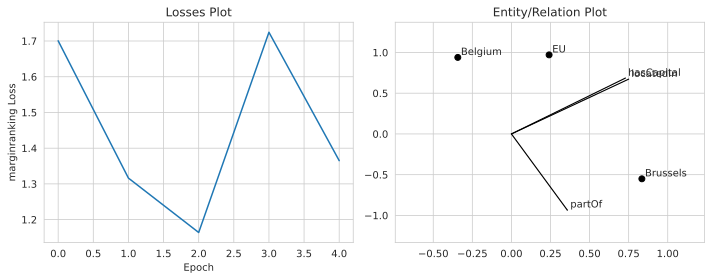

In [11]:
results.plot(
    er_kwargs=dict(
        plot_relations=True,
        plot_entities=True,        
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)

In [39]:
results.model.entity_representations[0]().cpu().detach().numpy()

array([[-0.72737044,  0.6862451 ],
       [ 0.7824523 ,  0.6227105 ],
       [ 0.42194417, -0.9066219 ]], dtype=float32)

Training with slower learning and more epochs

In [25]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

INFO:pykeen.pipeline.api:Using device: cpu
Training epochs on cpu: 100%|██████████| 128/128 [00:15<00:00,  8.46epoch/s, loss=0, prev_loss=0]          
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


Training with appropriate softplus

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot'}>],
       dtype=object))

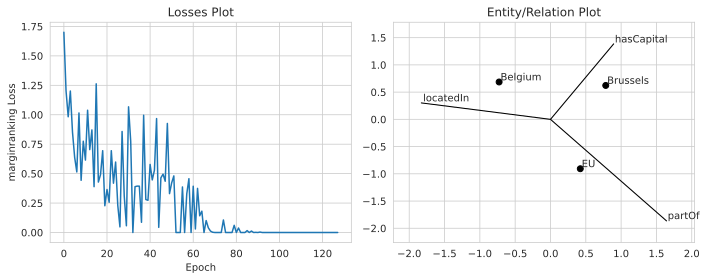

In [26]:
results.plot(
    er_kwargs=dict(
        plot_relations=True,
        plot_entities=True,        
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)

In [40]:
results = pipeline(
    training=tf,
    testing=tf,
    model="TransE",
    loss="softplus",
    model_kwargs=dict(embedding_dim=2),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=128, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

INFO:pykeen.pipeline.api:Using device: cpu
Training epochs on cpu: 100%|██████████| 128/128 [00:16<00:00,  7.74epoch/s, loss=0.403, prev_loss=0.401]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
INFO:pykeen.evaluation.evaluator:Evaluation took 0.01s seconds


(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='softplus Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot'}>],
       dtype=object))

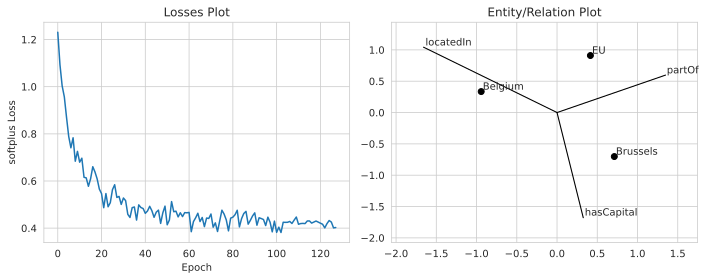

In [41]:
results.plot(
    er_kwargs=dict(
        plot_relations=True,
        plot_entities=True,        
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)

In [ ]:
toy_results.plot(er_kwargs=dict(plot_relations=True))
plt.savefig("results/toy_3.png", dpi=300)

## Benchmark Dataset Example

In [29]:
nations_results = pipeline(
    dataset="Nations",
    model="TransE",
    model_kwargs=dict(embedding_dim=8),
    optimizer_kwargs=dict(lr=1.0e-1),
    training_kwargs=dict(num_epochs=80, use_tqdm_batch=False),
    evaluation_kwargs=dict(use_tqdm=False),
    random_seed=1,
    device="cpu",
)

INFO:pykeen.pipeline.api:Using device: cpu
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///home/nnnpooh/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///home/nnnpooh/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///home/nnnpooh/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO:pykeen.triples.triples_factory:Loading from file:///home/nnnpooh/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/validation
Training epochs on cpu: 100%|██████████| 80/80 [00:10<00:00,  7.80epoch/s, loss=0.869, prev_loss=0.874]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setti

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot using PCA'}>],
       dtype=object))

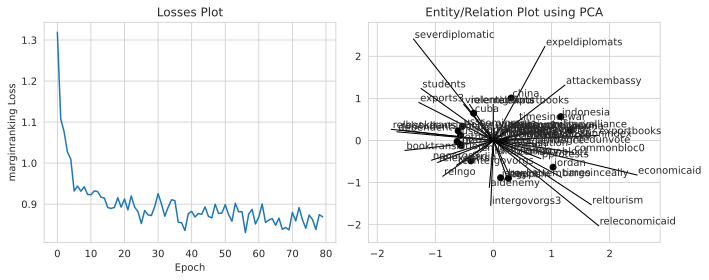

In [30]:
nations_results.plot(
    er_kwargs=dict(
        plot_relations=True,
        plot_entities=True,        
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity Plot using PCA'}>],
       dtype=object))

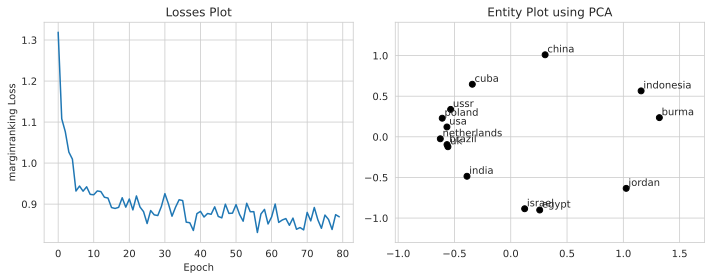

In [31]:
nations_results.plot(
    er_kwargs=dict(
        plot_relations=False,
        plot_entities=True,        
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)

(<Figure size 1000x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>,
        <AxesSubplot:title={'center':'Entity/Relation Plot using PCA'}>],
       dtype=object))

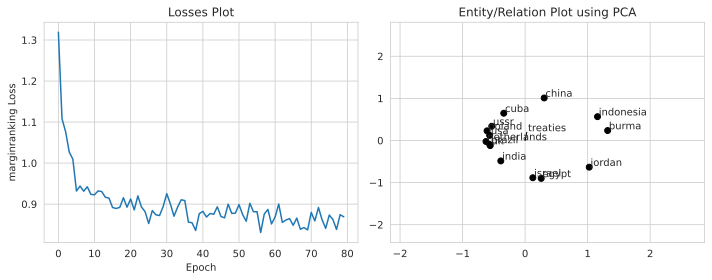

In [33]:
nations_results.plot(
    er_kwargs=dict(
        plot_relations=True,
        plot_entities=True,
        relations={"treaties"},     
        entity_embedding_getter = entity_embedding_getter_TransE,
        relation_embedding_getter = relation_embedding_getter_TransE, 
    )
)